In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmlstm_network import HMLSTMNetwork
import tensorflow as tf
from text_input_utils import prepare_inputs
import tensorflow as tf
from string import ascii_lowercase

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Regression example

In [2]:
# simulate multiresolution data
num_signals = 1000
signal_length = 100 * 2
x = np.linspace(0, 20 * np.pi, signal_length)
signals = [#np.random.normal(0, 1, size=signal_length) 
           (2 * np.sin(1 * x + np.random.random() * 100 * np.pi))
           + (5 * np.sin(.3 * x + np.random.random() * 100 * np.pi))
          for _ in range(num_signals)]

split = int(num_signals * .8)
train = signals[:split]
test = signals[split:]

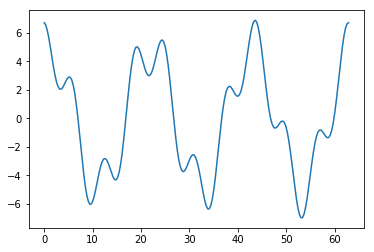

In [3]:
# example signal
plt.plot(x, signals[2]);

In [4]:
# prepare data
train_batches_in = []
train_batches_out = []
batch_size = 2
start = 0
while start + batch_size < len(train):
    batch = train[start: start + batch_size]
    
    train_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    train_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size
    
    
batch_size = 1
start = 0
test_batches_in = []
test_batches_out = []
while start + batch_size < len(test):
    batch = test[start: start + batch_size]
    
    test_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    test_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size

In [5]:
tf.reset_default_graph()
network = HMLSTMNetwork(input_size=1, task='regression', hidden_state_sizes=100,
                       embed_size=200, out_hidden_size=100, num_layers=2)

In [6]:
network.train(train_batches_in, train_batches_out, load_existing_vars=False)

Epoch 0
loss: 2279.09
loss: 2166.71
loss: 2027.8
loss: 1876.2
loss: 1720.99
loss: 1536.84
loss: 1326.27
loss: 1117.62
loss: 770.568
loss: 527.2
loss: 358.074
loss: 467.133
loss: 579.942
loss: 504.269
loss: 430.801
loss: 336.494
loss: 236.326
loss: 233.394
loss: 245.447
loss: 263.152
loss: 251.164
loss: 258.694
loss: 224.633
loss: 217.101
loss: 184.945
loss: 166.516
loss: 150.467
loss: 147.378
loss: 156.691
loss: 147.215
loss: 144.048
loss: 133.218
loss: 116.226
loss: 107.772
loss: 106.177
loss: 85.1278
loss: 99.9448
loss: 99.7702
loss: 93.09
loss: 86.8578
loss: 73.9436
loss: 69.3307
loss: 60.0995
loss: 55.0115
loss: 51.866
loss: 63.3768
loss: 51.1052
loss: 47.4685
loss: 43.6701
loss: 40.8471
loss: 40.7537
loss: 44.004
loss: 42.5882
loss: 37.522
loss: 37.3437
loss: 40.2888
loss: 39.3979
loss: 39.8238
loss: 36.0171
loss: 42.1323
loss: 34.0648
loss: 39.9829
loss: 36.2044
loss: 34.2007
loss: 35.2977
loss: 33.9103
loss: 38.8589
loss: 40.9277
loss: 33.447
loss: 32.5171
loss: 32.1023
loss: 35

In [7]:
boundaries = network.predict_boundaries(test_batches_in[0][0])
print(boundaries)

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt
[[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
    1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
    1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
    1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.
    1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
    1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  1.  1. 

In [8]:
predictions = network.predict(test_batches_in[0][0])
print(predictions)

loading variables...
INFO:tensorflow:Restoring parameters from ./hmlstm.ckpt
[[[ -3.55250597e+00]]

 [[ -2.79816818e+00]]

 [[ -2.09881020e+00]]

 [[ -2.15077209e+00]]

 [[ -2.65505648e+00]]

 [[ -3.24000788e+00]]

 [[ -3.75341702e+00]]

 [[ -4.17307472e+00]]

 [[ -4.48335981e+00]]

 [[ -4.66331005e+00]]

 [[ -4.67485619e+00]]

 [[ -4.48575783e+00]]

 [[ -4.07703447e+00]]

 [[ -3.44142413e+00]]

 [[ -2.59441185e+00]]

 [[ -1.58093500e+00]]

 [[ -4.98663247e-01]]

 [[  8.26935768e-02]]

 [[  5.61379850e-01]]

 [[  1.53718567e+00]]

 [[  2.35332823e+00]]

 [[  3.00262737e+00]]

 [[  3.51229119e+00]]

 [[  3.72533774e+00]]

 [[  3.68620038e+00]]

 [[  3.49197793e+00]]

 [[  3.20561361e+00]]

 [[  2.87923503e+00]]

 [[  2.57134318e+00]]

 [[  2.32066345e+00]]

 [[  2.17397690e+00]]

 [[  2.17262077e+00]]

 [[  2.32757640e+00]]

 [[  2.63697410e+00]]

 [[  3.07283425e+00]]

 [[  3.59195113e+00]]

 [[  4.14916182e+00]]

 [[  4.66660881e+00]]

 [[  5.08507538e+00]]

 [[  5.36141825e+00]]

 [[

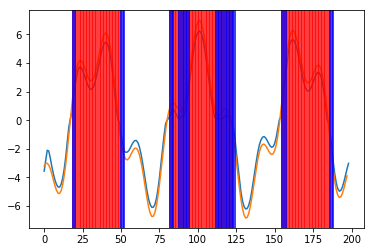

In [9]:
plt.plot(predictions.flatten())
plt.plot(test_batches_in[0][0][1:])

colors = ['r', 'b', 'g', 'o']
for l, layer in enumerate(boundaries[0]):
    # TODO: Better layout for timesteps when multiple indicators fire
    for i, indicator in enumerate(layer):
        if indicator == 1.:
            plt.axvline(i, color=colors[l]);

### Text classificaiton example

In [ ]:
tf.reset_default_graph()
network = HMLSTMNetwork(output_size=29, input_size=29,
                        embed_size=1024, out_hidden_size=500,
                        hidden_state_sizes=200)

In [ ]:
batch_size = 2
truncate_len = 100
num_layers = 3
num_batches = 100

inputs = prepare_inputs(
    batch_size=batch_size, truncate_len=truncate_len, num_batches=num_batches)

In [ ]:
# test on last input\
network.train(inputs[0][:-1], inputs[1][:-1], load_existing_vars=True)

In [51]:
# predictions on last input
indicators = network.predict_boundaries(inputs[0][-1][0], reuse=True)
indicators

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [ ]:
# predictions on last input
predictions = network.predict(inputs[0][-1][0], reuse=True)

In [ ]:
def get_text(encoding):
    prediction = ''
    
    for char in np.squeeze(encoding):
        max_likelihood = np.where(char == np.max(char))[0][0]
        if max_likelihood < 26:
            prediction += ascii_lowercase[max_likelihood]
        elif max_likelihood == 26:
            prediction += ','
        elif max_likelihood == 27:
            prediction += '.'
        elif max_likelihood == 28:
            prediction += ' '
    
    return prediction

In [48]:
get_text(predictions)

'erl   nd ahes aoouene  ah te as eres eng   s ahrrl aetantanh ah tas  as   hhethaou  aooanthahh  oter'

In [49]:
get_text(inputs[0][-1][0][1:])

'ell. and this promises to be interesting. it would be a pity to miss it.   but your client     neve'